# Priority Queue

In [266]:
# Note that tuples have an ordering so we can put key/value 
# pairs into a priority queue:
a=(1,"abc")
b=(4,"hello")
print ("a=",a," b=",b)
print (a<b, a>b, a==b)

a= (1, 'abc')  b= (4, 'hello')
True False False


In [267]:
class PriorityQueue():
    '''
    The arguments passed to a PriorityQueue must consist of
    objects than can be compared using <.
    Use a tuple (priority, item) if necessary.
    '''

    def __init__(self):
        self._array = []
        self.node_coordinates = {}

    def push(self, obj):
        # append at end and bubble up
        self._array.append( obj )
        n = len(self._array)
        self._bubble_up(n-1)
        
    def pop(self):
        n = len(self._array)
        if n==0:
            return None
        if n==1:
            return self._array.pop()
        
        # replace with last item and sift down:
        obj = self._array[0]
        self._array[0] = self._array.pop()
        self._sift_down(0)
        return obj
    
    def _parent(self, n):
        return (n-1)//2

    def _left_child(self, n):
        return 2*n + 1

    def _right_child(self, n):
        return 2*n + 2

    def _bubble_up(self, index):
        while index>0:
            cur_item = self._array[index]
            parent_idx = self._parent(index)
            parent_item = self._array[parent_idx]
            if cur_item < parent_item:
                # swap with parent
                self._array[parent_idx] = cur_item
                self._array[index] = parent_item
                index = parent_idx
            else:
                break
    
    def _sift_down(self,index):
        n = len(self._array)
        
        while index<n:           
            cur_item = self._array[index]
            lc = self._left_child(index)
            if n <= lc:
                break

            # first set small child to left child:
            small_child_item = self._array[lc]
            small_child_idx = lc
            
            # right exists and is smaller?
            rc = self._right_child(index)
            if rc < n:
                r_item = self._array[rc]
                if r_item < small_child_item:
                    # right child is smaller than left child:
                    small_child_item = r_item
                    small_child_idx = rc
            
            # done: we are smaller than both children:
            if cur_item <= small_child_item:
                break
            
            # swap with smallest child:
            self._array[index] = small_child_item
            self._array[small_child_idx] = cur_item
            
            # continue with smallest child:
            index = small_child_idx
        
    def size(self):
        return len(self._array)
    
    def is_empty(self):
        return len(self._array) == 0
    
    def show(self):
        %matplotlib inline
        import matplotlib.pyplot as plt
        import math
        
        plt.figure(figsize=(15, 5))

        n = len(self._array)
        depth = math.floor(math.log2(n))
        index = n-1
        while index >= 0:
            lc = self._left_child(index)
            rc = self._right_child(index)
            if index < 2**depth-1 and lc < n:
                if rc < n:
                    dist = (self.node_coordinates[rc][0]-self.node_coordinates[lc][0])/2
                else:    
                    # unique node (if exists) that just have one child
                    dist = 1
                self.node_coordinates[index] = (self.node_coordinates[lc][0] + dist,self.node_coordinates[lc][1] + 1)
                plt.plot((self.node_coordinates[index][0],self.node_coordinates[lc][0]),
                         (self.node_coordinates[index][1],self.node_coordinates[lc][1]),'ro', hold=True)
                plt.plot((self.node_coordinates[index][0],self.node_coordinates[lc][0]),
                         (self.node_coordinates[index][1],self.node_coordinates[lc][1]),'b-', hold=True) 
                if rc < n:
                    plt.plot((self.node_coordinates[index][0],self.node_coordinates[rc][0]),
                         (self.node_coordinates[index][1],self.node_coordinates[rc][1]),'b-', hold=True)
            #second last row
            elif index < 2**depth-1 and lc >= n:
                self.node_coordinates[index] = (lc - 2**(depth-1) + 1,2)
                plt.plot(self.node_coordinates[index][0], self.node_coordinates[index][1],'ro', hold=True)

            #last row
            else:
                self.node_coordinates[index] = (index - 2**(depth-1),1)
                plt.plot(self.node_coordinates[index][0], self.node_coordinates[index][1],'ro', hold=True)
            
            label = self._array[index]
            plt.text(self.node_coordinates[index][0]-0.2,self.node_coordinates[index][1]-0.4,label)

            index -= 1
        xmin = 10000
        xmax = -1
        for index in self.node_coordinates:
            if self.node_coordinates[index][0] < xmin:
                xmin = self.node_coordinates[index][0]
            if self.node_coordinates[index][0] > xmax:
                xmax = self.node_coordinates[index][0]    
        plt.xlim(xmin-1,xmax+1)
        plt.ylim(0,depth + 2)
        plt.show()
        
    def heapify(self, items):
        """ Take an array of unsorted items and replace the contents
        of this priority queue by them. """
        # TODO
        self._array = items.copy()
        n = len(items)
        i = n//2
        while i >= 0:
            self._sift_down(i)
            i-=1

    def decrease_priority(self, old, new):
        # replace old by new and we can assume that new will compare smaller
        # (so priority is higher or the value is smaller)
        assert(new <= old)
        # TODO
        n = len(self._array)
        i = 0
        while i < n:
            if self._array[i] == old:
                break
            i += 1
            
        if i==n:
            return
        
        self._array[i] = new
        self._bubble_up(i)
            

In [268]:
# small demo where we fill and empty a priority queue with random numbers
import random
pq = PriorityQueue()
for i in range(20):
    pq.push(random.randint(0,100))
    
pq.show()
print ("empty = ", pq.is_empty(), ", size = ",pq.size())
print ("array: ", pq._array)

print ("\nin order:")
while not pq.is_empty():
    print (pq.pop(),end=" ")  
    
print ()
print ("empty = ", pq.is_empty(), ", size = ",pq.size())
print ("array: ", pq._array)


/usr/local/share/jupyterhub/env/jupyterhub/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


empty =  False , size =  20
array:  [5, 7, 22, 19, 12, 33, 39, 37, 21, 30, 46, 93, 35, 87, 59, 58, 56, 50, 22, 76]

in order:
5 7 12 19 21 22 22 30 33 35 37 39 46 50 56 58 59 76 87 93 
empty =  True , size =  0
array:  []


## Question 1
Implement PriorityQueue.show() that shows a graphical representation of the tree (either using matplotlib or by formatting text and print layer by layer, indented reasonably well):

/usr/local/share/jupyterhub/env/jupyterhub/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


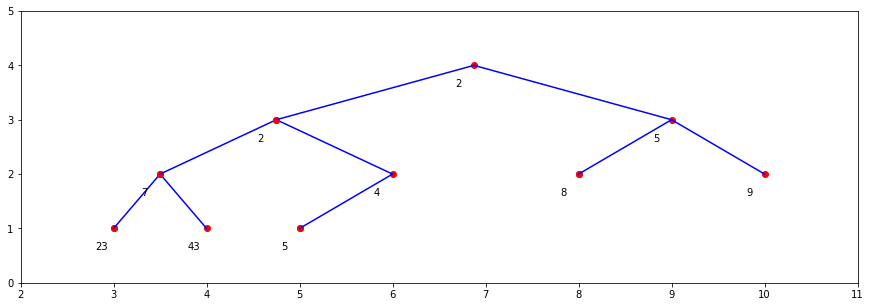

In [269]:
pq = PriorityQueue()
for i in [5,7,2,5,4,8,9,23,43,2]:
    pq.push(i)
pq.show()

## Question 2
You are given the following dictionary of people and their age. Use a priority queue (and no other data structure/array/...) to output their names sorted by age (once with increasing age, then with decreasing age). Print age and name for each person in a single line.

In [270]:
names = {"Noah":4, "Jacob":7, "Mia":10, "Ava":5, "Madison":1, "Charlotte":13}
pq = PriorityQueue()

# ??? Assume 'age + name's are distinct.

for name in names:
    pq.push((names[name],name))
print("Output with the increasing order: ")
while not pq.is_empty():
    nameAge = pq.pop()
    print(nameAge[1], ": ", nameAge[0])
print("Output with the decreasing order: ")
for name in names:
    pq.push((-names[name],name))
while not pq.is_empty():
    nameAge = pq.pop()
    print(nameAge[1], ": ", -nameAge[0])

Output with the increasing order: 
Madison :  1
Noah :  4
Ava :  5
Jacob :  7
Mia :  10
Charlotte :  13
Output with the decreasing order: 
Charlotte :  13
Mia :  10
Jacob :  7
Ava :  5
Noah :  4
Madison :  1


## Question 3
Implement heapify() and test that it works using the following code.

unsorted: [13, 97, 33, 94, 14, 43, 97, 44, 98, 84, 21, 41, 53, 43, 57, 52, 49, 82, 32, 64]
in PQ: [13, 14, 33, 32, 21, 41, 43, 44, 82, 64, 97, 43, 53, 97, 57, 52, 49, 94, 98, 84]


/usr/local/share/jupyterhub/env/jupyterhub/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


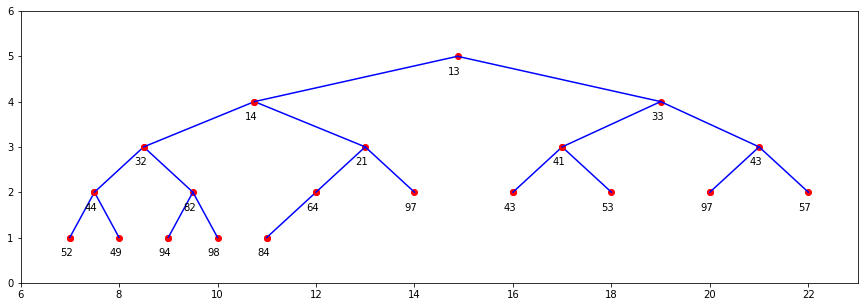

in order:
13 14 21 32 33 41 43 43 44 49 52 53 57 64 82 84 94 97 97 98 

In [271]:
import random
items = []
for i in range(20):
    items.append(random.randint(0,100))

print ("unsorted:", items)
pq = PriorityQueue()
pq.heapify(items)
print ("in PQ:", pq._array)
pq.show()

print ("in order:")
while not pq.is_empty():
    print (pq.pop(), end=" ")

## Question 4
implement decrease_priority() to decrease the priority of an item in the priority queue. Sadly, you have to search for the item before you can change it making the operation more expensive (please fill in below). This can be avoided, but we are not going to discuss this here.

array:  [1, 5, 3, 21, 27, 55, 14, 25, 23, 43, 57, 87, 63, 78, 75, 90]


/usr/local/share/jupyterhub/env/jupyterhub/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


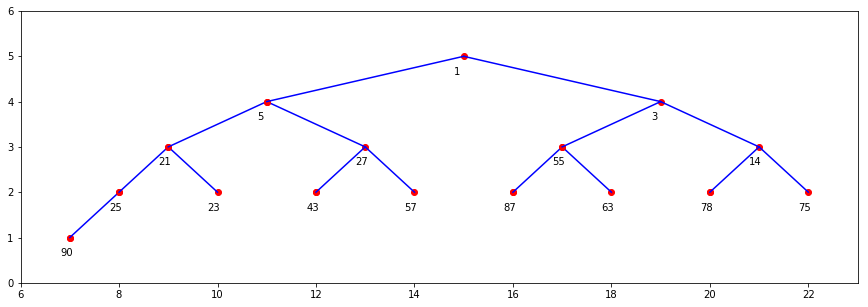

after:
array:  [1, 2, 3, 21, 5, 55, 14, 25, 23, 27, 57, 87, 63, 78, 75, 90]


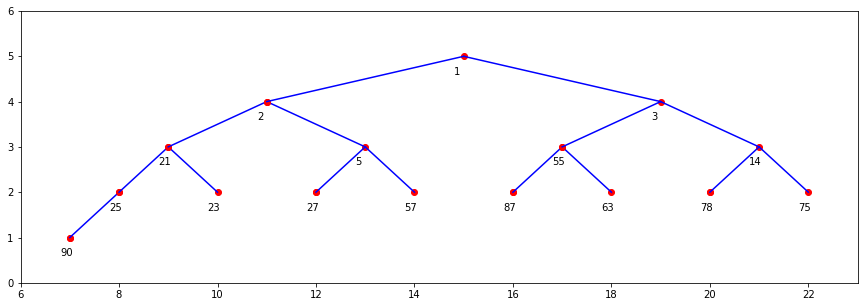

In [272]:
# the cost of decrease_priority() is O(nlog(n)) because we have 
# to search for the item first

items = [90, 25, 14, 5, 27, 63, 75, 1, 23, 43, 57, 87, 55, 78, 3, 21]
pq = PriorityQueue()
pq.heapify(items)

print ("array: ", pq._array)
pq.show()

pq.decrease_priority(43, 2)
print ("after:")
print ("array: ", pq._array)
pq.show()


## 5
Now similar to the name/age example before: 1) create a priority queue (this time using heapify, note that you need to create an array first) and show it, 2) change Jacob's age to 3 (using decrease_priority), 3) show the tree again

/usr/local/share/jupyterhub/env/jupyterhub/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


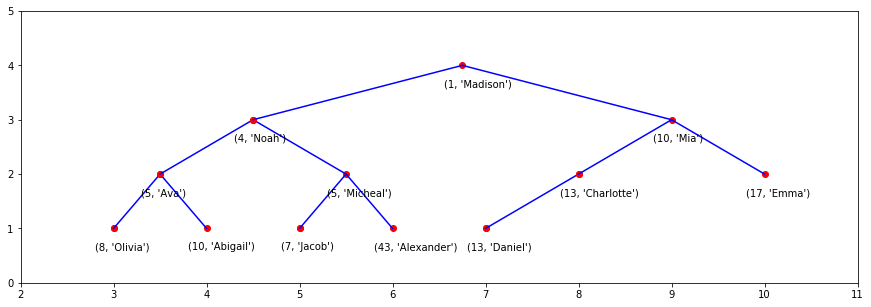

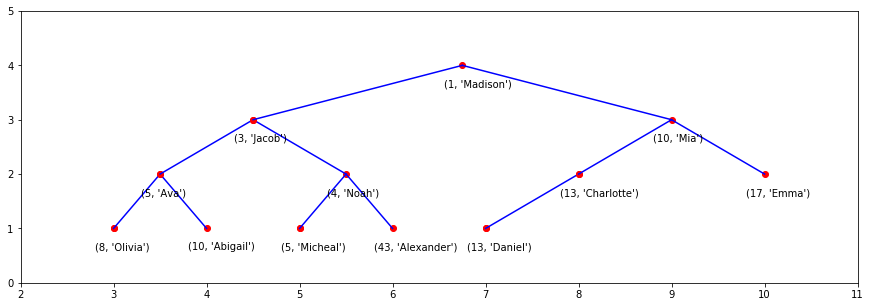

In [273]:
names = {"Noah":4, "Jacob":7, "Mia":10, "Ava":5, "Madison":1, "Charlotte":13, "Emma": 17, \
         "Olivia": 8, "Abigail": 10, "Micheal": 5, "Alexander": 43, "Daniel": 13}
pq = PriorityQueue()

# ???
items = []
for name in names:
    items.append((names[name],name))
pq.heapify(items)

pq.show()

pq.decrease_priority((7,"Jacob"),(3,"Jacob"))

pq.show()

